## INTRO

<img src="intro.PNG">


In this [competition](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview), Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing.

**Data:** This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

**Approach:** I start with EDA revealing missing data, variable distribution, cardinality, rare values, etc. Second, I transform categorical data thresholding rare values and using one-hot-encoding for features with low-cardinality and target-monotonig-increasing encoding for those with higher cardinality. Then, a number of feature selection techniques are used to reduce data dimensionlity (reduction from 376 to 12). Finally, I use a LightGBM with Gridsearched parameters with log-scalled dependent variable for the final submission.

**Result:** The comptition assess using R². My model achieved an R²=0.53691. This is not far away from the best score of the competition R²=0.5555

## Import and setup

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pd.set_option('max_rows', 350)
pd.set_option('max_columns', 400)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train set shape: {}'.format(train.shape))
print('Test set shape: {}'.format(test.shape))                

Train set shape: (4209, 378)
Test set shape: (4209, 377)


In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [5]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,

## EDA

In [10]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0000

For many of the nummerical variables there is a high inbalance - e.g. for Variable X15 with mean=0.000475 - meaning almost all values are 0s

### CHECK DATASETS' LENGTH AND FEATURE' TYPE

In [6]:
# Check Data Types
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [7]:
# Check Data Types
test.dtypes.value_counts()

int64     369
object      8
dtype: int64

### CHECK FOR MISSING VALUES

In [11]:
# Check for missing values
train.isnull().sum().sort_values(ascending=False).head()

X385    0
X132    0
X123    0
X124    0
X125    0
dtype: int64

In [12]:
# Check for missing values
test.isnull().sum().sort_values(ascending=False).head()

X385    0
X132    0
X123    0
X124    0
X125    0
dtype: int64

In [13]:
# Extract categorical and numerical features
categorical = [var for var in train.columns if train[var].dtype == 'O']
numerical = [var for var in train.columns if train[var].dtype != 'O' and var!='y']
print('Categorical Variables')
print(categorical)
print()
print('Numerical Variables')
print(numerical)

Categorical Variables
['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

Numerical Variables
['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136

### CHECK THE CARDINALITY

In [19]:
tmp1 = []
tmp2 = []
for var in numerical:
    tmp1.append(var)
    tmp2.append(train[var].nunique())
    
tmp3 = pd.DataFrame({'Var': tmp1, '# of Unique Values': tmp2})
tmp3 = tmp3.sort_values(by='# of Unique Values', ascending=False)
tmp3.head(20)

,Var,# of Unique Values
0,ID,4209
249,X264,2
247,X262,2
246,X261,2
245,X260,2
244,X259,2
243,X258,2
242,X257,2
241,X256,2
240,X255,2


Check Constant Features

In [15]:
booleans = [var for var in numerical if train[var].nunique() < 2]
booleans_test = [var for var in numerical if test[var].nunique() < 2]
print(len(booleans))
print(len(booleans_test))
booleans

12
5


['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [16]:
for var in booleans:
    print('Feature {} / # of Values {}'.format(var, test[var].nunique()))

Feature X11 / # of Values 2
Feature X93 / # of Values 2
Feature X107 / # of Values 2
Feature X233 / # of Values 2
Feature X235 / # of Values 2
Feature X268 / # of Values 2
Feature X289 / # of Values 2
Feature X290 / # of Values 2
Feature X293 / # of Values 2
Feature X297 / # of Values 2
Feature X330 / # of Values 2
Feature X347 / # of Values 2


In [17]:
for var in booleans_test:
    print('Feature {} / # of Values {}'.format(var, train[var].nunique()))

Feature X257 / # of Values 2
Feature X258 / # of Values 2
Feature X295 / # of Values 2
Feature X296 / # of Values 2
Feature X369 / # of Values 2


### Categorical Features

In [18]:
# Check the cardinality in the categorical features
print('Categorical Features')
for var in categorical:
    print('# of values for feature {}:   {}'.format(var, test[var].nunique()))

Categorical Features
# of values for feature X0:   49
# of values for feature X1:   27
# of values for feature X2:   45
# of values for feature X3:   7
# of values for feature X4:   4
# of values for feature X5:   32
# of values for feature X6:   12
# of values for feature X8:   25


In [20]:
low_card = [var for var in categorical if train[var].nunique() < 10]
mid_card = [var for var in categorical if train[var].nunique() >= 10 and train[var].nunique() <= 20]
high_card = [var for var in categorical if train[var].nunique() > 20]
print('Low Card features are   {}'.format(len(low_card)))
print(low_card)
print('Mid Card features are   {}'.format(len(mid_card)))
print(mid_card)
print('High Card features are   {}'.format(len(high_card)))
print(high_card)

Low Card features are   2
['X3', 'X4']
Mid Card features are   1
['X6']
High Card features are   5
['X0', 'X1', 'X2', 'X5', 'X8']


In [21]:
train[categorical]

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


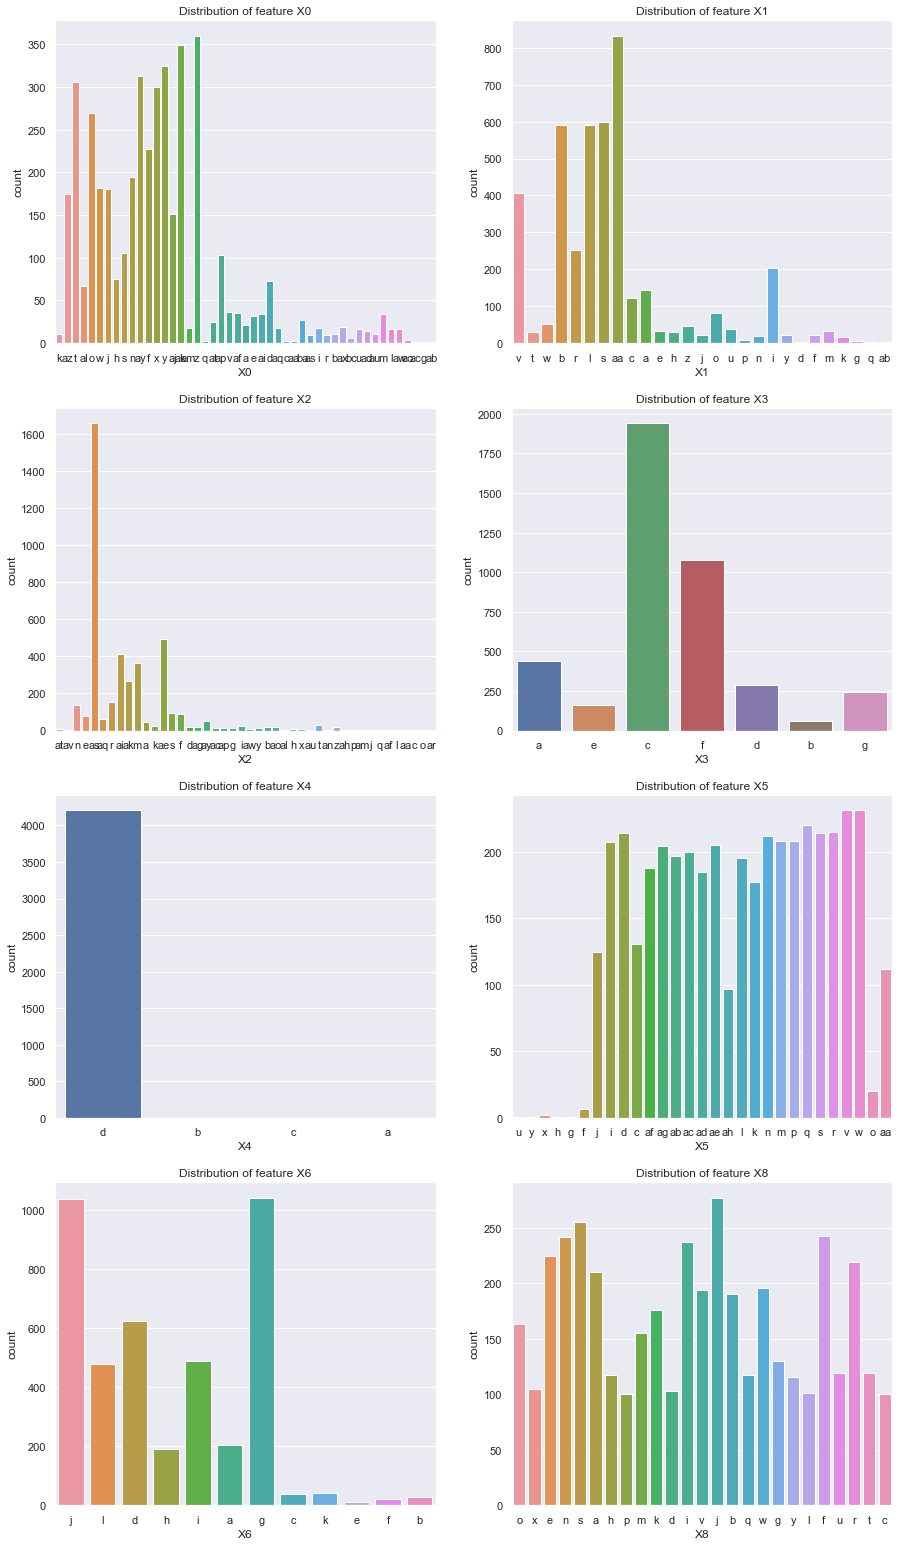

In [23]:
plt.rcParams['figure.figsize'] = [15, 15] 
plt.subplots_adjust(hspace =0.2, top=1.5)
for i, var in enumerate(categorical):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=var, data=train)
    plt.title('Distribution of feature {}'.format(var))

In [24]:
for var in categorical:
    
    tmp = train[var].value_counts()/ len(train)
    tmp = tmp.sort_values(ascending=False).head(7)
    print('Variable {}'.format(var))
    print(tmp)
    print()

Variable X0
z     0.085531
ak    0.082918
y     0.076978
ay    0.074364
t     0.072701
x     0.071276
o     0.063911
Name: X0, dtype: float64

Variable X1
aa    0.197909
s     0.142077
b     0.140651
l     0.140176
v     0.096935
r     0.059634
i     0.048230
Name: X1, dtype: float64

Variable X2
as    0.394155
ae    0.117843
ai    0.098598
m     0.087194
ak    0.062960
r     0.036351
n     0.032549
Name: X2, dtype: float64

Variable X3
c    0.461392
f    0.255643
a    0.104538
d    0.068900
g    0.057258
e    0.038727
b    0.013542
Name: X3, dtype: float64

Variable X4
d    0.999050
a    0.000475
c    0.000238
b    0.000238
Name: X4, dtype: float64

Variable X5
w    0.054882
v    0.054882
q    0.052269
r    0.051081
s    0.050843
d    0.050843
n    0.050368
Name: X5, dtype: float64

Variable X6
g    0.247565
j    0.246852
d    0.148491
i    0.115942
l    0.113566
a    0.048943
h    0.045141
Name: X6, dtype: float64

Variable X8
j    0.065811
s    0.060584
f    0.057733
n    0.057496
i

**What we know so far:**

- no missing values
- features are the same in the train and in the test set

**Numerical Features**
- 8 categorical and 369 numerical features
- There are 12 numerical features containing only 1 value in the train set and 5 in the test set
    - These featrues are different for the Train and Test set
- All other numerical features contain only 2 values: are actually booleans

**Categorical Features**
- Some features have rare values
- Have different cardinality
- Feature X4 experineces in more than 99.9% of the cases the same value
- X3 and X6 could be one-hot encoded
- For all others Rare - depending on results: one hot or other encoding (Ordinal based on alphabetical order / relationship between variable and output

### Target Analysis

Text(0.5, 1.0, 'Histogramm ')

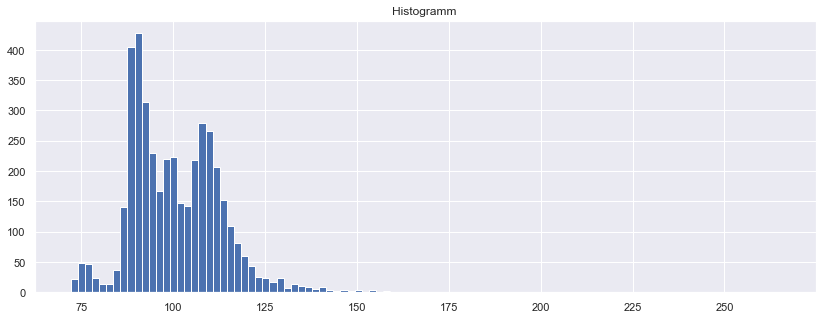

In [25]:
train.y.hist(figsize=(14, 5), bins=100)
plt.title('Histogramm ')

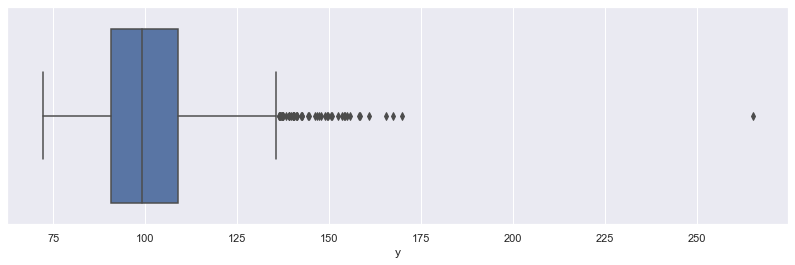

In [26]:
fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(x='y', data=train)

The target variable is skewed to the one side
* Maybe I should put outliers into boundaries
* Maybe predict the log / because the data is skewed
* Because of the many outliers a three-based model could work better (potentially)

## Feature Engineering

### Numerical Variables

The numerical features are already binary encoded

### Categorical Features

* First, creating a category Rare Labels containing labels with less than 2% of the observations
* Encoding One-hot the labels with low cardinality X3 and X6 and X4
* Encoding target-related X1, X2, X5, X6, X8

#### First, creating a category Rare Labels containing labels with less than 2% of the observations

In [27]:
Xtrain, Xtest = train.copy(), test.copy()

In [28]:
def find_frequent_categories(df, variable, tolerance):
    tmp = df[variable].value_counts() / len(df)
    non_rare = [x for x in tmp.loc[tmp>tolerance].index]
    return non_rare

In [29]:
def rare_encoding(X_train, X_test, variable, tolerance):
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    #find frequent categories
    frequent_categories = find_frequent_categories(X_train, variable, tolerance)
    
    #Assign Rare to non-freuent values
    X_train = np.where(X_train[variable].isin(frequent_categories),
                       X_train[variable],'Rare')
    X_test = np.where(X_test[variable].isin(frequent_categories),
                       X_test[variable],'Rare')
    
    return X_train, X_test

In [30]:
for var in categorical:
    Xtrain[var], Xtest[var] = rare_encoding(train, test, var, 0.02)

In [31]:
for var in categorical:
    print(var)
    print(str(round(Xtrain[var].value_counts()/len(train), 3)*100))
    print()

X0
Rare    15.9
z        8.6
ak       8.3
y        7.7
ay       7.4
t        7.3
x        7.1
o        6.4
f        5.4
n        4.6
w        4.3
j        4.3
az       4.2
aj       3.6
s        2.5
ap       2.4
Name: X0, dtype: float64

X1
aa      19.8
s       14.2
b       14.1
l       14.0
Rare    11.2
v        9.7
r        6.0
i        4.8
a        3.4
c        2.9
Name: X1, dtype: float64

X2
as      39.4
Rare    12.7
ae      11.8
ai       9.9
m        8.7
ak       6.3
r        3.6
n        3.3
s        2.2
f        2.1
Name: X2, dtype: float64

X3
c       46.1
f       25.6
a       10.5
d        6.9
g        5.7
e        3.9
Rare     1.4
Name: X3, dtype: float64

X4
d       99.9
Rare     0.1
Name: X4, dtype: float64

X5
w       5.5
v       5.5
q       5.2
r       5.1
d       5.1
s       5.1
n       5.0
p       4.9
m       4.9
i       4.9
ae      4.9
ag      4.8
ac      4.8
ab      4.7
l       4.6
af      4.5
ad      4.4
k       4.2
c       3.1
j       3.0
aa      2.7
ah      2.3
Rar

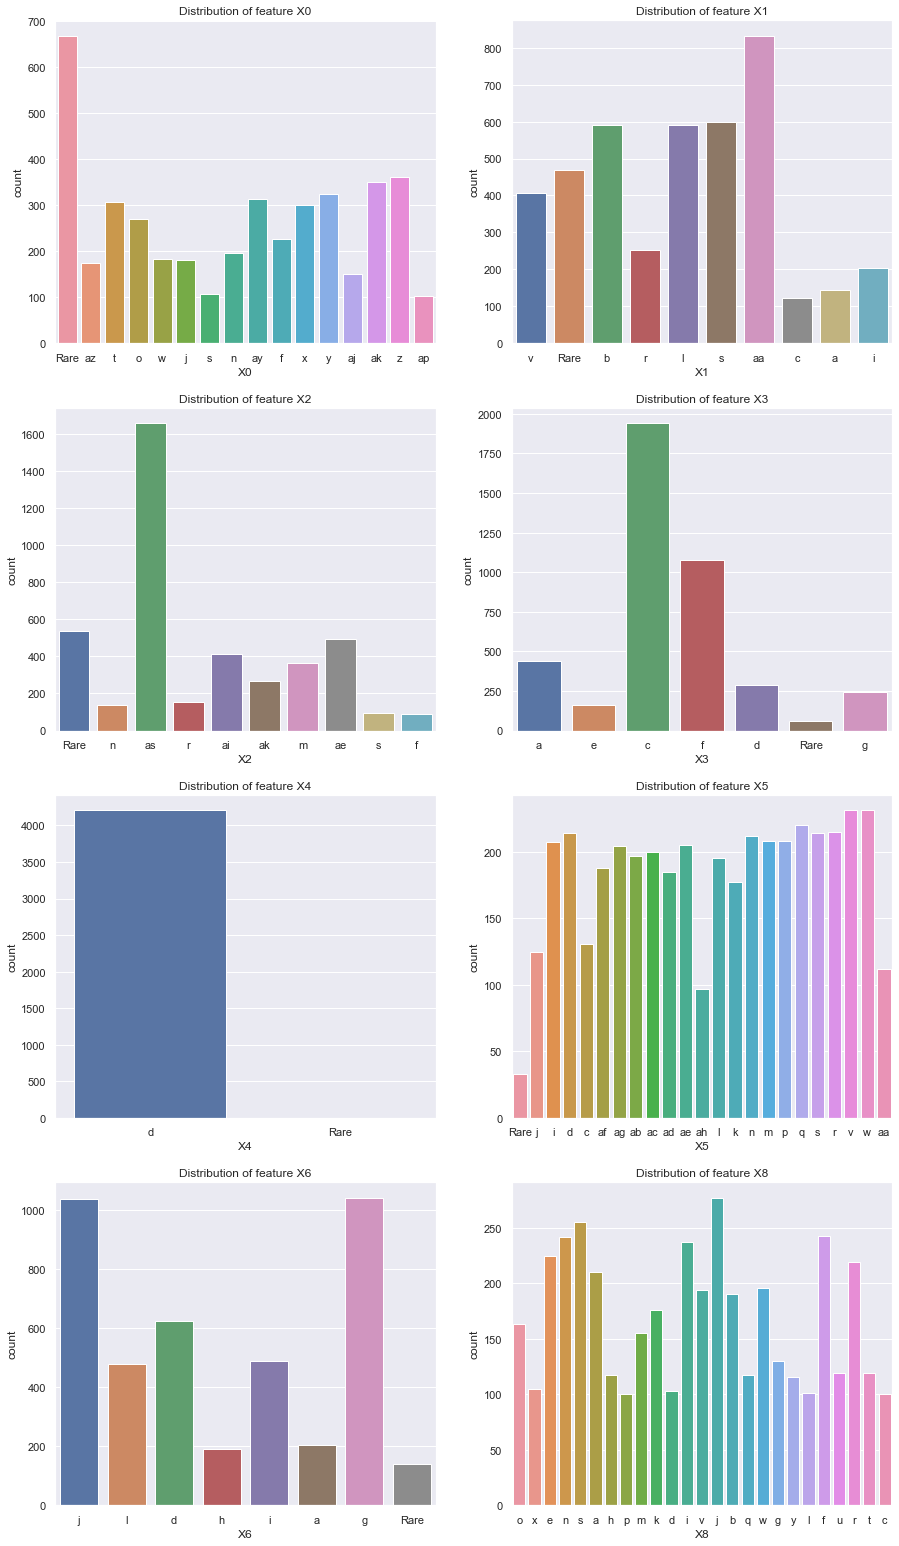

In [32]:
# plt.rcParams['figure.figsize'] = [15, 15] 
plt.subplots_adjust(hspace =0.2, top=1.5)
for i, var in enumerate(categorical):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=var, data=Xtrain)
    plt.title('Distribution of feature {}'.format(var))

#### Encoding One-hot the labels with low cardinality X3 and X6 and X4

In [33]:
one_hot_columns = ['X3','X6', 'X4']

In [35]:
from sklearn.preprocessing import OneHotEncoder

# we create and train the encoder
encoder = OneHotEncoder(categories='auto',
                       drop=None,
                       sparse=False,
                       handle_unknown='ignore') # helps deal with rare labels

encoder.fit(Xtrain[one_hot_columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [36]:
# we observe the learned categories
encoder.categories_

[array(['Rare', 'a', 'c', 'd', 'e', 'f', 'g'], dtype=object),
 array(['Rare', 'a', 'd', 'g', 'h', 'i', 'j', 'l'], dtype=object),
 array(['Rare', 'd'], dtype=object)]

In [37]:
# transform the train set
tmp_Xtrain = encoder.transform(Xtrain[one_hot_columns])
tmp_Xtrain = pd.DataFrame(tmp_Xtrain, columns=['X3_Rare', 'X3_a', 'X3_c', 'X3_d', 'X3_e', 'X3_f', 'X3_g',
                           'X6_Rare', 'X6_a', 'X6_d', 'X6_g', 'X6_h', 'X6_i', 'X6_j', 'X6_l',
                           'X4_Rare', 'X4_d'])

In [38]:
tmp_Xtest = encoder.transform(Xtest[one_hot_columns])
tmp_Xtest = pd.DataFrame(tmp_Xtest, columns=['X3_Rare', 'X3_a', 'X3_c', 'X3_d', 'X3_e', 'X3_f', 'X3_g',
                           'X6_Rare', 'X6_a', 'X6_d', 'X6_g', 'X6_h', 'X6_i', 'X6_j', 'X6_l',
                           'X4_Rare', 'X4_d'])

In [42]:
tmp_Xtrain.head()

,X3_Rare,X3_a,X3_c,X3_d,X3_e,X3_f,X3_g,X6_Rare,X6_a,X6_d,X6_g,X6_h,X6_i,X6_j,X6_l,X4_Rare,X4_d
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
Xtrain.drop(labels=['X3', 'X6', 'X4'], axis=1, inplace=True)
Xtest.drop(labels=['X3', 'X6', 'X4'], axis=1, inplace=True)

In [40]:
Xtrain = pd.concat((Xtrain, tmp_Xtrain), axis=1)
Xtest = pd.concat((Xtest, tmp_Xtrain), axis=1)

In [41]:
Xtrain.shape, Xtest.shape

((4209, 392), (4209, 391))

#### Encoding target-related X0, X1, X2, X5, X8

In [43]:
# Covert Strings to numbers
def find_categorical_mappings(df, var):
    #generating an ordered list
    ordered_labels = Xtrain.groupby([var])['y'].mean().sort_values().index
    
    #return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}

In [44]:
def integer_encode(train, test, var, ordinal_mapping):
    train[var] = train[var].map(ordinal_mapping)
    test[var] = test[var].map(ordinal_mapping)

In [45]:
#I will transform the categorical features as well as the boolen Missing Indicators
for var in ['X0', 'X1', 'X2', 'X5', 'X8']:
    mappings = find_categorical_mappings(Xtrain, var)
    integer_encode(Xtrain, Xtest, var, mappings)

In [46]:
Xtrain.shape, Xtest.shape

((4209, 392), (4209, 391))

In [47]:
Xtrain.head()

,ID,y,X0,X1,X2,X5,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,X3_Rare,X3_a,X3_c,X3_d,X3_e,X3_f,X3_g,X6_Rare,X6_a,X6_d,X6_g,X6_h,X6_i,X6_j,X6_l,X4_Rare,X4_d
0,0,130.81,8,7,6,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,6,88.53,8,0,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,7,76.26,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,

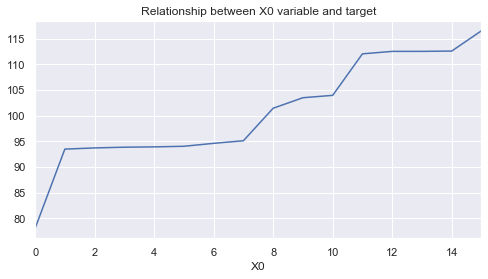

1


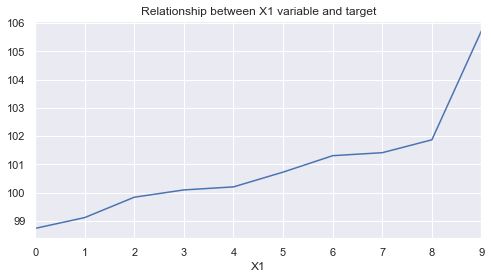

2


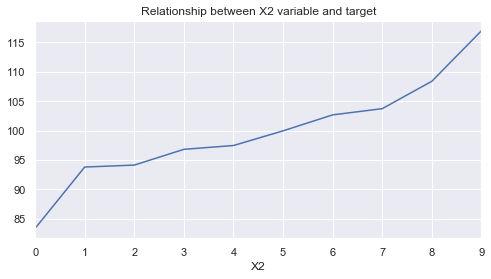

3


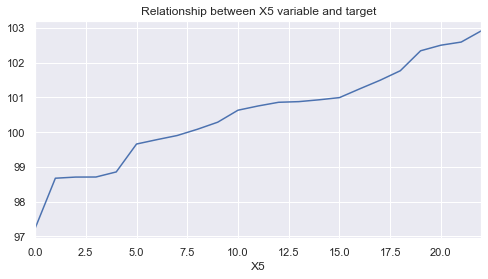

4


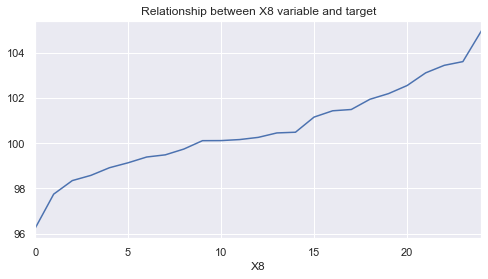

5


In [48]:
# Explore the realtionship between categorical variabels and the target
i = 0
for var in ['X0', 'X1', 'X2', 'X5', 'X8']:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    fig = Xtrain.groupby([var])['y'].mean().plot()
    fig.set_title('Relationship between {} variable and target'.format(var))
    fig.set_ylabel = ('Mean SalePrice')
    plt.show()
    print(i)

## Feature Selection

* Remove constant features
* Remove duplicated features
* Remove highly correlated features
* Select features based on their impact on the R2 when using LightGBM

### Removing constant features

In [50]:
Xtrain_basic = Xtrain.copy()
Xtest_basic = Xtest.copy()

In [51]:
# Removing quasi constant features (where 98% of the entries have the same value):
quasi_constants = []
for var in Xtrain_basic.columns:
    tem = Xtrain_basic[var].value_counts()/Xtrain_basic.shape[0]
    if tem.iloc[0] >= 0.98:
        quasi_constants.append(var)
len(quasi_constants)

180

In [52]:
quasi_constants

['X10',
 'X11',
 'X15',
 'X16',
 'X17',
 'X18',
 'X21',
 'X24',
 'X26',
 'X30',
 'X32',
 'X33',
 'X34',
 'X36',
 'X39',
 'X40',
 'X41',
 'X42',
 'X44',
 'X47',
 'X53',
 'X55',
 'X57',
 'X59',
 'X60',
 'X62',
 'X63',
 'X65',
 'X67',
 'X73',
 'X74',
 'X77',
 'X78',
 'X82',
 'X83',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X97',
 'X99',
 'X102',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X110',
 'X112',
 'X122',
 'X123',
 'X124',
 'X125',
 'X141',
 'X145',
 'X153',
 'X159',
 'X160',
 'X165',
 'X167',
 'X169',
 'X172',
 'X173',
 'X174',
 'X176',
 'X183',
 'X184',
 'X185',
 'X190',
 'X192',
 'X195',
 'X196',
 'X199',
 'X200',
 'X203',
 'X204',
 'X205',
 'X206',
 'X207',
 'X210',
 'X211',
 'X212',
 'X213',
 'X214',
 'X216',
 'X217',
 'X221',
 'X227',
 'X230',
 'X231',
 'X233',
 'X235',
 'X236',
 'X237',
 'X239',
 'X240',
 'X242',
 'X243',
 'X245',
 'X248',
 'X249',
 'X252',
 'X253',
 'X254',
 'X255',
 'X257',
 'X258',
 'X259',
 'X260',
 'X262',
 'X

In [53]:
Xtrain_basic.drop(labels=quasi_constants, inplace=True, axis=1)
Xtest_basic.drop(labels=quasi_constants,  inplace=True, axis=1)

In [54]:
Xtrain_basic.shape, Xtest_basic.shape

((4209, 212), (4209, 211))

### Duplicated Features

In [55]:
# Check for dupplicate rows after transposing the columns
X_train_t = Xtrain_basic.T
X_train_t.duplicated().sum()

18

In [56]:
features_to_drop = X_train_t[X_train_t.duplicated()].index

In [57]:
features_to_drop

Index(['X35', 'X37', 'X76', 'X84', 'X113', 'X119', 'X134', 'X146', 'X147',
       'X222', 'X226', 'X232', 'X244', 'X247', 'X279', 'X324', 'X326', 'X360'],
      dtype='object')

In [58]:
Xtrain_basic.drop(labels=features_to_drop, axis=1, inplace=True)
Xtest_basic.drop(labels=features_to_drop, axis=1, inplace=True)
Xtrain_basic.shape, Xtest_basic.shape

((4209, 194), (4209, 193))

### Removing highly correlated features

I will delete correlated features showing 90% or higher correlation. I would like to shrink the feature space, to reduce the chance of overfitting.

In [65]:
# Checking for correlated features
corrmat = Xtrain_basic.corr()
corrmat = corrmat.abs().unstack().sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.9] 
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
print('Number of highly correlated features: {}'.format(len(corrmat)))
corrmat

Number of highly correlated features: 138


,feature1,feature2,corr
0,X156,X157,1.000000
1,X157,X156,1.000000
2,X49,X129,0.997790
3,X129,X49,0.997790
4,X215,X19,0.994691
5,X19,X215,0.994691
6,X136,X263,0.994274
7,X263,X136,0.994274
8,X29,X136,0.994274
9,X263,X54,0.994274


In [66]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(Xtrain_basic, 0.90)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  42
{'X140', 'X346', 'X66', 'X215', 'X219', 'X179', 'X229', 'X61', 'X368', 'X311', 'X130', 'X314', 'X238', 'X120', 'X158', 'X263', 'X136', 'X111', 'X367', 'X157', 'X150', 'X137', 'X129', 'X251', 'X337', 'X352', 'X276', 'X250', 'X362', 'X348', 'X101', 'X194', 'X272', 'X264', 'X162', 'X198', 'X187', 'X358', 'X363', 'X328', 'X265', 'X54'}


In [67]:
Xtrain_basic.drop(labels=corr_features, axis=1, inplace=True)
Xtest_basic.drop(labels=corr_features, axis=1, inplace=True)
Xtrain_basic.shape, Xtest_basic.shape

((4209, 152), (4209, 151))

### Keeping only features showing a cetain relationship with the dependent variable

In [68]:
X_train_lgb = Xtrain_basic.copy()
X_test_lgb = Xtest_basic.copy()

In [69]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [70]:
# Splitting in train and dev in order to derive the most important features individually
X_train_tmp, X_dev_tmp, y_train_tmp, y_dev_tmp = train_test_split(X_train_lgb.iloc[:,2:], X_train_lgb.iloc[:,1], test_size = 0.2, random_state = 0)

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

In [71]:
# build initial model using all the features
model_all_features = lgbm.LGBMRegressor(n_jobs=-1)

model_all_features.fit(X_train_tmp, y_train_tmp)

# calculate the R2 in the test set
y_pred_test = model_all_features.predict(X_dev_tmp)
r2_score_all = r2_score(y_dev_tmp, y_pred_test)
print('Test all features lgbm R2 = %f' % (r2_score_all))

Test all features lgbm R2 = 0.460973


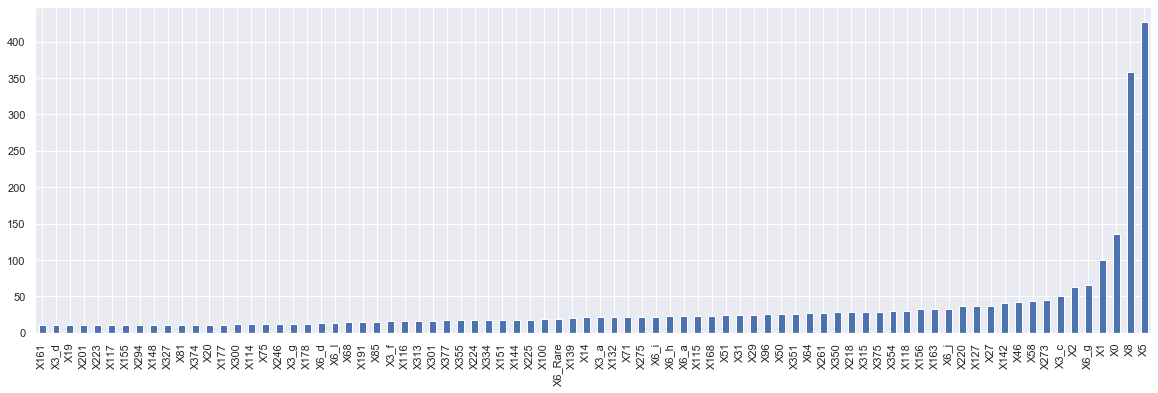

In [72]:
# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train_tmp.columns

# sort the features by importance
features.sort_values(ascending=True, inplace=True)

# plot
features.tail(80).plot.bar(figsize=(20,6))

In [73]:
features = list(features.index)

In [74]:
# recursive feature elimination:

# first we arbitrarily set the drop in r2
# if the drop is below this threshold,
# the feature will be removed
tol = 0.001

print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
features_to_remove = []

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = lgbm.LGBMRegressor(n_jobs=-1)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
    model_int.fit(
        X_train_tmp.drop(features_to_remove + [feature], axis=1), y_train_tmp)

    # make a prediction over the test set
    y_pred_dev = model_int.predict(
        X_dev_tmp.drop(features_to_remove + [feature], axis=1))

    # calculate the new r2
    r2_score_int = r2_score(y_dev_tmp, y_pred_dev)
    print('New Test r2 = {}'.format((r2_score_int)))

    # print the original r2 with all the features
    print('All features Test r2 = {}'.format((r2_score_all)))

    # determine the drop in the r2
    diff_r2 = r2_score_all - r2_score_int

    # compare the drop in r2 with the tolerance
    # we set previously
    if diff_r2 >= tol:
        print('Drop in r2 ={}'.format(diff_r2))
        print('keep: ', feature)
        print
    else:
        print('Drop in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print
        # if the drop in the r2 is small and we remove the
        # feature, we need to set the new r2 to the one based on
        # the remaining features
        r2_score_all = r2_score_int
        
        # and append the feature to remove to the collecting
        # list
        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  X331  which is feature  1  out of  150
New Test r2 = 0.4609730747815117
All features Test r2 = 0.4609730747815117
Drop in r2 = 0.0
remove:  X331

testing feature:  X170  which is feature  2  out of  150
New Test r2 = 0.4609730747815117
All features Test r2 = 0.4609730747815117
Drop in r2 = 0.0
remove:  X170

testing feature:  X166  which is feature  3  out of  150
New Test r2 = 0.4609730747815117
All features Test r2 = 0.4609730747815117
Drop in r2 = 0.0
remove:  X166

testing feature:  X48  which is feature  4  out of  150
New Test r2 = 0.4609730747815117
All features Test r2 = 0.4609730747815117
Drop in r2 = 0.0
remove:  X48

testing feature:  X378  which is feature  5  out of  150
New Test r2 = 0.4609730747815117
All features Test r2 = 0.4609730747815117
Drop in r2 = 0.0
remove:  X378

testing feature:  X69  which is feature  6  out of  150
New Test r2 = 0.4609730747815117
All features Test r2 = 0.4609730747815117
Drop in r2 = 0

New Test r2 = 0.44766480371681516
All features Test r2 = 0.46375615537748816
Drop in r2 =0.016091351660672992
keep:  X356

testing feature:  X340  which is feature  48  out of  150
New Test r2 = 0.46128716165449446
All features Test r2 = 0.46375615537748816
Drop in r2 =0.0024689937229936953
keep:  X340

testing feature:  X186  which is feature  49  out of  150
New Test r2 = 0.4508814707595582
All features Test r2 = 0.46375615537748816
Drop in r2 =0.012874684617929955
keep:  X186

testing feature:  X349  which is feature  50  out of  150
New Test r2 = 0.4590613874388215
All features Test r2 = 0.46375615537748816
Drop in r2 =0.004694767938666633
keep:  X349

testing feature:  X3_e  which is feature  51  out of  150
New Test r2 = 0.45839319187786853
All features Test r2 = 0.46375615537748816
Drop in r2 =0.005362963499619622
keep:  X3_e

testing feature:  X52  which is feature  52  out of  150
New Test r2 = 0.45101488820453095
All features Test r2 = 0.46375615537748816
Drop in r2 =0.012741

New Test r2 = 0.4563427889012963
All features Test r2 = 0.4688976617661029
Drop in r2 =0.01255487286480661
keep:  X191

testing feature:  X85  which is feature  95  out of  150
New Test r2 = 0.4595186849690892
All features Test r2 = 0.4688976617661029
Drop in r2 =0.009378976797013716
keep:  X85

testing feature:  X3_f  which is feature  96  out of  150
New Test r2 = 0.45061606379376706
All features Test r2 = 0.4688976617661029
Drop in r2 =0.01828159797233586
keep:  X3_f

testing feature:  X116  which is feature  97  out of  150
New Test r2 = 0.4572158338118376
All features Test r2 = 0.4688976617661029
Drop in r2 =0.011681827954265311
keep:  X116

testing feature:  X313  which is feature  98  out of  150
New Test r2 = 0.4579730375830734
All features Test r2 = 0.4688976617661029
Drop in r2 =0.01092462418302953
keep:  X313

testing feature:  X301  which is feature  99  out of  150
New Test r2 = 0.4620739227576045
All features Test r2 = 0.4688976617661029
Drop in r2 =0.0068237390084984195


New Test r2 = 0.4520839541841657
All features Test r2 = 0.4688976617661029
Drop in r2 =0.01681370758193723
keep:  X46

testing feature:  X58  which is feature  142  out of  150
New Test r2 = 0.45978221239805406
All features Test r2 = 0.4688976617661029
Drop in r2 =0.009115449368048867
keep:  X58

testing feature:  X273  which is feature  143  out of  150
New Test r2 = 0.4563329518939795
All features Test r2 = 0.4688976617661029
Drop in r2 =0.012564709872123436
keep:  X273

testing feature:  X3_c  which is feature  144  out of  150
New Test r2 = 0.4557831787620339
All features Test r2 = 0.4688976617661029
Drop in r2 =0.013114483004069033
keep:  X3_c

testing feature:  X2  which is feature  145  out of  150
New Test r2 = 0.46532652770602334
All features Test r2 = 0.4688976617661029
Drop in r2 =0.0035711340600795838
keep:  X2

testing feature:  X6_g  which is feature  146  out of  150
New Test r2 = 0.4494139977063799
All features Test r2 = 0.4688976617661029
Drop in r2 =0.0194836640597230

## Train a model

### Gridsearch over the selected features

In [75]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
lgbm_gs = lgb.LGBMRegressor(seed=1301,
                          n_jobs=-1)

# Parameters for Gridsearch
param_gs = {'num_leaves': [10, 20, 50, 100], 
         'objective': ['regression'],
         'max_depth': [10, 20, 30],
         'learning_rate': [0.05, 0.1, 0.01, 0.001],
         'max_bin': [50, 100, 500],
            }
param_gs['metric'] = [
                     'r2'
                  ]

grid_search_lgb = GridSearchCV(lgbm_gs, param_grid=param_gs, cv=3, scoring='r2')
lgbm = grid_search_lgb.fit(X_train_lgb[features_to_keep], X_train_lgb.iloc[:,1])

In [77]:
lgbm.best_params_

{'learning_rate': 0.05,
 'max_bin': 50,
 'max_depth': 10,
 'metric': 'r2',
 'num_leaves': 10,
 'objective': 'regression'}

In [78]:
lgbm.best_score_

0.5632846079364809

### LGBM Predictions

In [80]:
lgb_params = {
    'learning_rate': 0.05,
    'max_bin': 50,
    'max_depth': 10,
#     'metric': 'r2',
    'num_leaves': 10,
    'objective': 'regression',
#     'verbose': 2,
#     'device': 'gpu',
            }

lgb_params['metric'] = [
                    'mean_squared_error'
                  ]

#### Prediction over the set after all feature selection techniques

In [81]:
# Creating datasets
train_data = lgb.Dataset(X_train_tmp[features_to_keep], label=y_train_tmp)
dev_data = lgb.Dataset(X_dev_tmp[features_to_keep], label=y_dev_tmp, reference=train_data)

In [82]:
# Training
num_round=1000
lgbm=lgb.train(lgb_params, train_set=train_data,
               valid_sets=dev_data, num_boost_round=num_round,
               early_stopping_rounds=50,  
              )

[1]	valid_0's l2: 177.304
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 169.343
[3]	valid_0's l2: 162.209
[4]	valid_0's l2: 155.722
[5]	valid_0's l2: 149.892
[6]	valid_0's l2: 144.611
[7]	valid_0's l2: 139.904
[8]	valid_0's l2: 135.642
[9]	valid_0's l2: 131.799
[10]	valid_0's l2: 128.368
[11]	valid_0's l2: 125.248
[12]	valid_0's l2: 122.456
[13]	valid_0's l2: 119.918
[14]	valid_0's l2: 117.658
[15]	valid_0's l2: 115.631
[16]	valid_0's l2: 113.771
[17]	valid_0's l2: 112.149
[18]	valid_0's l2: 110.665
[19]	valid_0's l2: 109.318
[20]	valid_0's l2: 108.087
[21]	valid_0's l2: 107.091
[22]	valid_0's l2: 106.112
[23]	valid_0's l2: 105.246
[24]	valid_0's l2: 104.461
[25]	valid_0's l2: 103.803
[26]	valid_0's l2: 103.176
[27]	valid_0's l2: 102.575
[28]	valid_0's l2: 102.075
[29]	valid_0's l2: 101.591
[30]	valid_0's l2: 101.224
[31]	valid_0's l2: 100.9
[32]	valid_0's l2: 100.606
[33]	valid_0's l2: 100.343
[34]	valid_0's l2: 100.116
[35]	valid_0's l2: 99.9017
[36]	

In [83]:
# calculate the R2 in the test set
y_pred_test = lgbm.predict(X_dev_tmp[features_to_keep])
r2_score_all = r2_score(y_dev_tmp, y_pred_test)
print('Test all features lgbm R2 = %f' % (r2_score_all))

Test all features lgbm R2 = 0.470546


#### Prediction over the set after basic feature selection

In [84]:
train_data_simple = lgb.Dataset(X_train_tmp, label=y_train_tmp)
dev_data_simple = lgb.Dataset(X_dev_tmp, label=y_dev_tmp, reference=train_data)

In [85]:
#Training
num_round=1000
lgbm=lgb.train(lgb_params, train_set=train_data_simple,
               valid_sets=dev_data_simple, num_boost_round=num_round,
               early_stopping_rounds=50)

[1]	valid_0's l2: 177.304
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 169.343
[3]	valid_0's l2: 162.147
[4]	valid_0's l2: 155.659
[5]	valid_0's l2: 149.836
[6]	valid_0's l2: 144.593
[7]	valid_0's l2: 139.89
[8]	valid_0's l2: 135.593
[9]	valid_0's l2: 131.753
[10]	valid_0's l2: 128.322
[11]	valid_0's l2: 125.204
[12]	valid_0's l2: 122.41
[13]	valid_0's l2: 119.902
[14]	valid_0's l2: 117.617
[15]	valid_0's l2: 115.589
[16]	valid_0's l2: 113.783
[17]	valid_0's l2: 112.107
[18]	valid_0's l2: 110.644
[19]	valid_0's l2: 109.302
[20]	valid_0's l2: 108.087
[21]	valid_0's l2: 107.073
[22]	valid_0's l2: 106.137
[23]	valid_0's l2: 105.257
[24]	valid_0's l2: 104.479
[25]	valid_0's l2: 103.736
[26]	valid_0's l2: 103.149
[27]	valid_0's l2: 102.55
[28]	valid_0's l2: 102.05
[29]	valid_0's l2: 101.675
[30]	valid_0's l2: 101.26
[31]	valid_0's l2: 100.897
[32]	valid_0's l2: 100.601
[33]	valid_0's l2: 100.336
[34]	valid_0's l2: 100.107
[35]	valid_0's l2: 99.891
[36]	vali

In [86]:
# calculate the R2 in the test set
y_pred_test = lgbm.predict(X_dev_tmp)
r2_score_all = r2_score(y_dev_tmp, y_pred_test)
print('Test all features lgbm R2 = %f' % (r2_score_all))

Test all features lgbm R2 = 0.469137


#### Prediction after all feature selection techniques and logaritmic scale of the dependent variable

In [87]:
# Try with log data
train_data_log = lgb.Dataset(X_train_tmp[features_to_keep], label=np.log(y_train_tmp))
dev_data_log = lgb.Dataset(X_dev_tmp[features_to_keep], label=np.log(y_dev_tmp), reference=train_data)

In [88]:
#training our model using light gbm
num_round=1000
lgbm_log=lgb.train(lgb_params, train_set=train_data_log,
               valid_sets=dev_data_log, num_boost_round=num_round,
               early_stopping_rounds=50)

[1]	valid_0's l2: 0.0147604
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 0.0139532
[3]	valid_0's l2: 0.0132253
[4]	valid_0's l2: 0.0125711
[5]	valid_0's l2: 0.0119785
[6]	valid_0's l2: 0.0114419
[7]	valid_0's l2: 0.0109606
[8]	valid_0's l2: 0.0105288
[9]	valid_0's l2: 0.0101349
[10]	valid_0's l2: 0.00978202
[11]	valid_0's l2: 0.00946681
[12]	valid_0's l2: 0.0091749
[13]	valid_0's l2: 0.00891934
[14]	valid_0's l2: 0.00869208
[15]	valid_0's l2: 0.00848013
[16]	valid_0's l2: 0.00829337
[17]	valid_0's l2: 0.00812499
[18]	valid_0's l2: 0.00796888
[19]	valid_0's l2: 0.00782484
[20]	valid_0's l2: 0.00770126
[21]	valid_0's l2: 0.00758748
[22]	valid_0's l2: 0.00748558
[23]	valid_0's l2: 0.00739832
[24]	valid_0's l2: 0.00731503
[25]	valid_0's l2: 0.00723948
[26]	valid_0's l2: 0.0071709
[27]	valid_0's l2: 0.00711636
[28]	valid_0's l2: 0.00706127
[29]	valid_0's l2: 0.00700871
[30]	valid_0's l2: 0.00696555
[31]	valid_0's l2: 0.00692371
[32]	valid_0's l2: 0.00689417

In [89]:
# calculate the R2 in the test set
y_pred_test = lgbm_log.predict(X_dev_tmp[features_to_keep])

r2_score_all = r2_score(y_dev_tmp, np.exp(y_pred_test))
print('Test all features lgbm R2 = %f' % (r2_score_all))

Test all features lgbm R2 = 0.471408


## Final Predictions

In [90]:
train_data_log = lgb.Dataset(X_train_tmp[features_to_keep], label=np.log(y_train_tmp))

In [91]:
num_round=90
lgbm_log_final=lgb.train(lgb_params, train_set=train_data_log,
               num_boost_round=num_round)

In [92]:
preds = lgbm_log_final.predict(X_test_lgb[features_to_keep])
preds = np.exp(preds)

In [93]:
# Cehck the predictions
preds

array([ 78.22385715,  91.0457964 ,  78.95676601, ...,  93.40282217,
       110.11745654,  91.65399019])

In [94]:
test_id = test.iloc[:,0]

In [95]:
submission = pd.DataFrame({"ID":test_id, "y": preds})
submission.to_csv("submission_v1.csv", index=False)

In [96]:
submission

,ID,y
0,1,78.223857
1,2,91.045796
2,3,78.956766
3,4,78.273354
4,5,110.868974
...,...,...
4204,8410,102.455939
4205,8411,92.198063
4206,8413,93.402822
4207,8414,110.117457


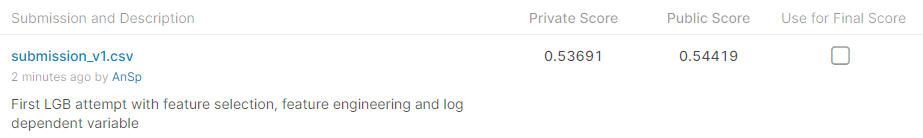

In [746]:
from IPython.display import Image
Image("results_submission.PNG")

This is not far away from the best result of 0.5555